In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.linear_model import LinearRegression

In [93]:
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9,
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114,
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217]
x = np.asarray(x, np.float32)
y = np.asarray(y, np.float32)

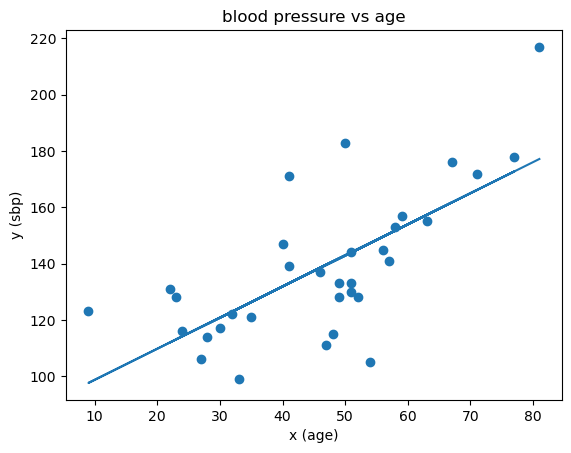

intercept =  87.67143 slope =  1.1050217


In [94]:
plt.scatter(x=x, y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"slope = ", res.coef_[0])

In [95]:
x_sub = x[0:5]
y_sub = y[0:5]

a = 1
b = 100
y_hat = a*x_sub + b
r = (y_sub - y_hat)

MSE = np.sum(np.square(r) / len(y_sub))
MSE

317.2

In [96]:
a = 1
b = 100
y_hat = a*x + b
r = (y - y_hat)

MSE = np.sum(np.square(r) / len(y))
MSE

408.15152

In [97]:
a = 0.901   # optimum is 1.1050217   # try a diffrent value for a here that minimizes the MSE
b = 97.06   # optimum is 87.67143    # try a diffrent value for b here that minimizes the MSE

y_hat = a*x + b
r = (y - y_hat)
MSE = np.sum(np.square(r)) / len(y)
MSE

360.2501479640151

In [98]:
a_hat = np.sum((x-np.mean(x)) * ((y-np.mean(y)))) / (np.sum(np.square(x-np.mean(x))))
b_hat = np.mean(y) - a_hat*np.mean(x)

a = a_hat
b = b_hat
y_hat = a*x + b
r = (y-y_hat)
MSE = np.sum(r**2) / len(y)

print("slope: a_hat = ", a_hat)
print("intercept : b_hat = ", b_hat)
print("minimal MSE = ", MSE)

slope: a_hat =  1.1050217
intercept : b_hat =  87.67143
minimal MSE =  349.20090553977275


In [99]:
b = 87.6
a = np.arange(-1, 2, 0.02)
MSE = np.zeros(len(a))
for i in range(0, len(a)):
    MSE[i] = np.mean(np.square(y-(a[i] * x + b)))

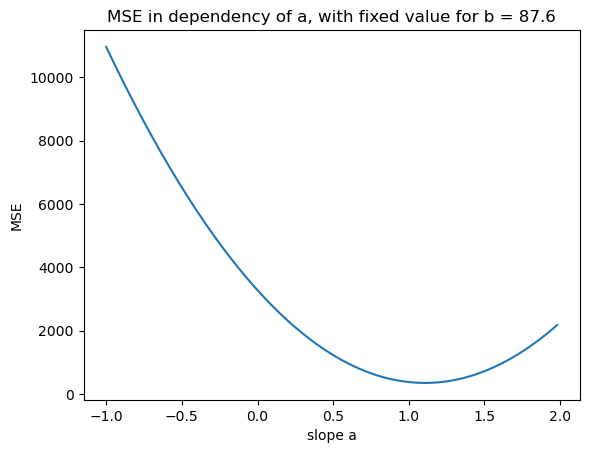

In [100]:
plt.plot(a, MSE)
plt.title("MSE in dependency of a, with fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.show()

In [105]:
a_ = -0.5
a_history = -0.5
eta = 0.0002089771523
for i in range(0, 5):
    grad_a = -2/len(y)*np.sum((y -a_ * x - b)*x)
    a_ = a_ - eta*grad_a
    a_history = np.append(a_history, a_)
print(a_history)

[-0.5         1.10639856  1.1063985   1.10639856  1.1063985   1.10639856]


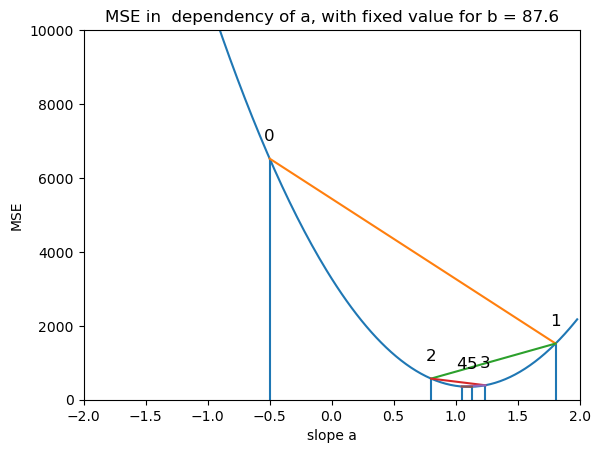

In [102]:
plt.plot(a, MSE)
plt.title("MSE in  dependency of a, with fixed value for b = 87.6")
plt.xlabel("slope a")
plt.ylabel("MSE")
plt.ylim((0,10000))
plt.xlim((-2,2))

for i in range(0, len(a_history)):
    plt.vlines(x=a_history[i], ymin=0, ymax=np.mean(np.square(y-(a_history[i] * x + b))))
    plt.text(x=a_history[i],y= np.mean(np.square(y-(a_history[i] * x + b)))+600,s= i,horizontalalignment='center',verticalalignment='center',fontsize=12)
for i in range(0,len(a_history)-1):
  plt.plot([a_history[i], a_history[i+1]],[np.mean(np.square(y-(a_history[i] * x + b))), np.mean(np.square(y-(a_history[i+1] * x + b)))])
plt.show()